In [9]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_moons 
import seaborn as sn
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X, y = make_moons(100, noise=0.25, random_state=2)

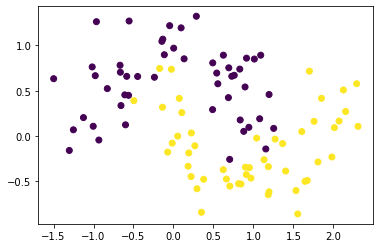

In [3]:
import matplotlib.pyplot as plt 
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [6]:
# fitting models
model1 = Sequential()

model1.add(Dense(128, input_dim=2, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
adam = Adam(learning_rate = 0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X,y, epochs=2000, validation_split=0.2, verbose=0)

3888/3888 ━━━━━━━━━━━━━━━━━━━━ 4s 892us/step


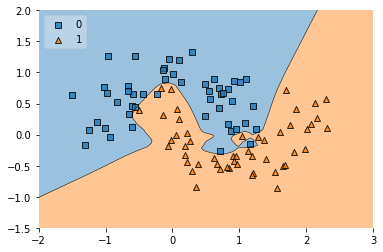

In [10]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5, 2)
plt.show()

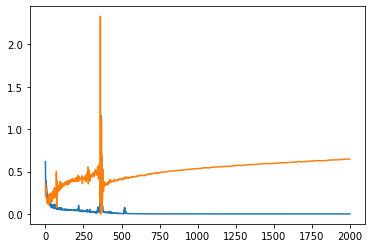

In [11]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [16]:
# Model2
#from mlxtend.plotting import plot_decision_regions

model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# optiomizers
#from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics =['accuracy'])

history2 = model2.fit(X,y, epochs=2000, validation_split=0.2, verbose=0)

3888/3888 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


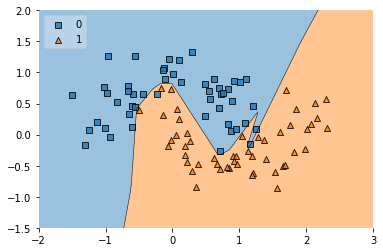

In [18]:
plot_decision_regions(X,y.astype('int'), clf=model2, legend=2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()

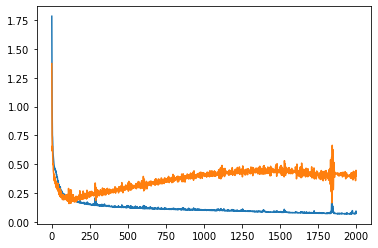

In [20]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [24]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

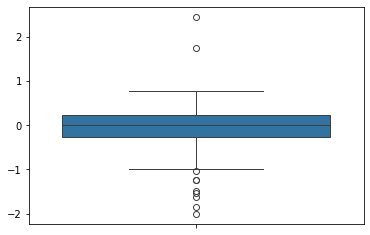

In [25]:
sns.boxplot(model1_weight_layer1)

<Axes: >

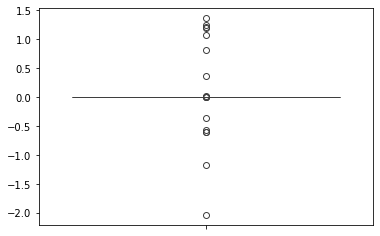

In [26]:
sns.boxplot(model2_weight_layer1)

In [27]:
model1_weight_layer1.min()

-2.0180662

In [28]:
model2_weight_layer1.min()

-2.0504024

/tmp/ipykernel_993176/3380537848.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
/tmp/ipykernel_993176/3380537848.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


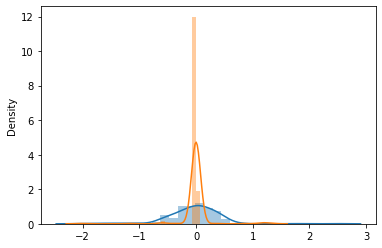

In [30]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)
plt.show()

In [31]:
model1.get_weights()[0].reshape(256)

array([-3.09399456e-01, -2.70211458e-01,  4.52676326e-01, -3.11380267e-01,
        4.09798652e-01, -8.88084471e-02, -1.28855243e-01,  2.91327447e-01,
        2.68384010e-01, -3.00841779e-01, -2.54780978e-01,  2.34989077e-01,
        2.48494759e-01, -2.58125097e-01,  4.60280865e-01, -3.45542729e-01,
        3.84974658e-01, -5.64962387e-01,  1.10920809e-01, -5.61214447e-01,
        2.29348779e-01, -4.93052661e-01, -3.85888785e-01, -1.82336107e-01,
        4.22716409e-01,  2.40026504e-01,  4.10440862e-01,  4.83344704e-01,
       -1.88471362e-01,  4.51672710e-02, -5.85702658e-01, -6.38084114e-01,
       -3.55398238e-01, -6.08868711e-02, -3.15754145e-01,  4.46188986e-01,
        5.25138557e-01,  6.30798340e-02,  6.86239079e-02,  4.29690033e-02,
        5.51700354e-01,  4.14692938e-01, -6.03018284e-01,  2.72108436e-01,
       -3.82166244e-02,  7.66876817e-01, -3.45300317e-01,  2.89440602e-01,
       -5.46253860e-01,  8.73107314e-02, -5.07893562e-01, -2.84521542e-02,
        1.74492579e-02, -